In [2]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import integrate
from scipy import interpolate
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d

# Data cleaning, all in SI units

# Not in use this time as the data is ready in SI units

   Corrected P  Drive Voltage     E_SI  Measured Polarization  P from R  \
0    -2.047388        -7.0190 -28076.0              -2.213653 -0.166265   
1    -2.043513        -2.8229 -11291.6              -2.209801 -0.166288   
2    -2.036145         3.5095  14038.0              -2.202431 -0.166286   
3    -2.028109        -1.2207  -4882.8              -2.194390 -0.166281   
4    -2.023924         2.6703  10681.2              -2.190202 -0.166277   

       P_SI  Time (ms)  
0 -0.020474       0.05  
1 -0.020435       0.10  
2 -0.020361       0.15  
3 -0.020281       0.20  
4 -0.020239       0.25  
#--------------------------below is after interting columns of P_SI AND E_SI0---------------------------------------#
   Corrected P  Drive Voltage     E_SI  Measured Polarization  P from R  \
0    -2.047388        -7.0190 -28076.0              -2.213653 -0.166265   
1    -2.043513        -2.8229 -11291.6              -2.209801 -0.166288   
2    -2.036145         3.5095  14038.0              -2.2

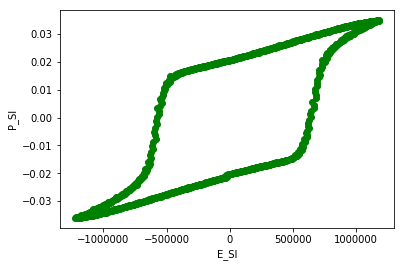

In [3]:
# path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
# output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\PE'


df = pd.read_csv(r'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_PUND\\360.05.csv',encoding= 'unicode_escape')
print(df.head(5))
#删除以前的错误 P_Si 和 E_SI 列，避免混乱
# df.drop(['P_SI'],axis=1,inplace=True)
# df.drop(['E_SI'],axis=1,inplace=True)
# print(df.head(5))

# convert P into C/m^2
# convert E into V/m
thickness = 250 # unit in micro-metre

# P_SI  = df['Corrected P']*0.01
# E_SI  = df['#Drive Voltage']/(thickness*0.000001)

# df.insert(len(df.columns), "E_SI", E_SI)
# df.insert(len(df.columns), "P_SI", P_SI)

print('#--------------------------below is after interting columns of P_SI AND E_SI0---------------------------------------#')
print(df.head(5))
print('#-------------------------------------------------------------------------------------------------------------------#')
plt.plot(df['E_SI'],df['P_SI'],'go--')
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show()

In [6]:
## 批量操作所有文件

path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\Raw data_SI units'
files = glob(path + "/*.csv")
thickness = 250 # unit in micro-metre
i = 0

for file in files:
    df = pd.read_csv(file,delimiter='\,')
    df.drop(['P_SI'],axis=1,inplace=True)
    df.drop(['E_SI'],axis=1,inplace=True)

    P_SI  = df['Corrected P']*0.01
    E_SI  = df['#Drive Voltage']/(thickness*0.000001)

    df.insert(len(df.columns), "E_SI", E_SI)
    df.insert(len(df.columns), "P_SI", P_SI)
    
    file_name = output_path +'\\'+ str(temperature[i])+'.csv'
    
    df.to_csv(file_name, index=None)
    i = i+1

C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


### 如果上面的loop无法运行，用这个cell 来 debug（一般问题是 csv读取格式/ delimiter 用逗号还是空格）
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\359.93.csv'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\Raw data_SI units'
files = glob(path + "/*.csv")
thickness = 250 # unit in micro-metre
df = pd.read_csv(file,delimiter='\,')
df.head(5)

# Resolve PE and find upper-branch

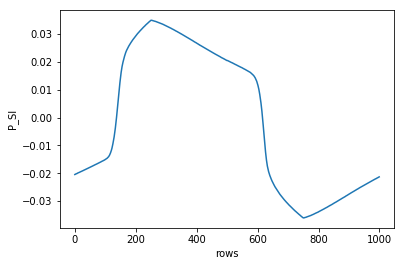

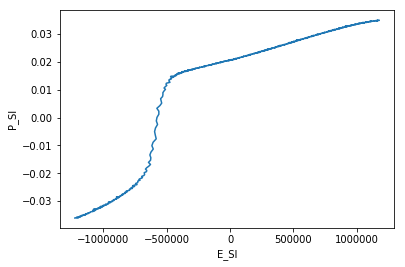

In [4]:
plt.plot(df['P_SI'])
plt.xlabel('rows')
plt.ylabel('P_SI')
plt.show()
index1 = df['P_SI'].idxmax()
index2 = df['P_SI'].idxmin()

###提取特定的行列，构成 P_upper_branch
# P_upper = df[index1:index2]
P_upper = df.loc[index1:index2, [ 'E_SI','P_SI']]
# print(P_upper)
plt.plot(P_upper['E_SI'],P_upper['P_SI'])
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show()

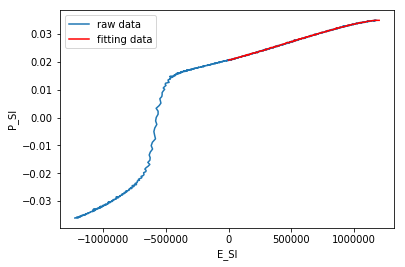

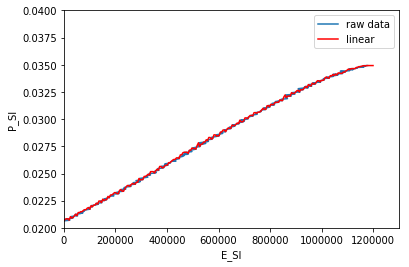

In [11]:
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
### 根据实验数据，插点 得到 P_SI, E_SI。 这一步的目的是为了之后 求 P（T），使得所有的 P（E）数据点对齐
x = P_upper['E_SI']
y = P_upper['P_SI']

## 如果需要 ， 可以smooth data！！！！！

# y = savgol_filter(P_upper['P_SI'], 21, 1)
# plt.plot(x, y)
# plt.show()
         
f = interp1d(x, y, fill_value="extrapolate",kind='next')
xnew = np.linspace(0, 1200000, num=240, endpoint=True)

plot1 = plt.plot(x, y,)
plot2 = plt.plot(xnew, f(xnew), 'r-')
plt.legend(['raw data', 'fitting data'], loc='best')
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show() 


plot1 = plt.plot(x, y,)
plot2 = plt.plot(xnew, f(xnew), 'r-')
plt.legend(['raw data', 'linear'], loc='best')
plt.axis([0,1300000,0.02,0.04])
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show() 

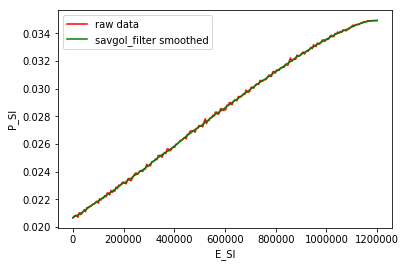

Length of data raws =  240


,E_SI,P_SI,P_smooth
0,0.000000,0.020656,0.020683
1,5020.920502,0.020789,0.020732
2,10041.841004,0.020841,0.020781
3,15062.761506,0.020841,0.020831
4,20083.682008,0.020708,0.020880


In [12]:
### PE的数据可能需要 smooth，所有插入一列
P_upper_fitting = pd.DataFrame()
P_upper_fitting.insert(len(P_upper_fitting.columns), "E_SI", xnew)
P_upper_fitting.insert(len(P_upper_fitting.columns), "P_SI", f(xnew))

P_smooth = savgol_filter(P_upper_fitting["P_SI"], 11, 1)
P_upper_fitting.insert(len(P_upper_fitting.columns), "P_smooth", P_smooth)

plt.plot(P_upper_fitting["E_SI"], P_upper_fitting["P_SI"], 'r-')
plt.plot(P_upper_fitting["E_SI"], P_upper_fitting["P_smooth"], 'g')
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.legend(['raw data', 'savgol_filter smoothed'], loc='best')
plt.show()
print('Length of data raws = ',len(P_upper_fitting))
P_upper_fitting.head(5)

#为上一栏调试 smooth 的参数： window size 51, polynomial order 3

x = P_upper_fitting["E_SI"]
y = P_upper_fitting["P_SI"]
yhat = savgol_filter(y, 11, 1) # window size 51, polynomial order 3
print(len(yhat))
plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.axis([1100000,1200000,0.013,0.015])
plt.show()

# Convert P(E) to P(T)

In [42]:
#从文件名提取温度with regular expression
# path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\Try'
path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_PUND'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".csv"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)
len(temperature)

[359.93, 360.05, 360.41, 360.8, 361.17, 361.4, 361.72, 362.03, 362.38, 362.65, 363.04, 363.37, 363.62, 363.96, 364.16, 364.54, 364.75, 364.92, 365.18, 365.41, 365.69, 365.92, 366.19, 366.35, 366.65, 366.91, 367.12, 367.4, 367.63, 367.89, 368.17, 368.4, 368.64, 368.88, 369.1, 369.37, 369.61, 369.91, 370.14, 370.39, 370.58, 370.89, 371.11, 371.37, 371.62, 371.83, 372.08, 372.33, 372.6, 372.82, 373.06, 373.35, 373.53, 373.79, 374.06, 374.3, 374.57, 374.79, 375.07, 375.27, 375.55, 375.77, 376.04, 376.31, 376.47, 376.82, 377.08, 377.25, 377.52, 377.9, 378.06, 378.34, 378.62, 378.88, 379.02, 379.25, 379.64, 379.79, 380.06, 380.29, 380.54, 380.79, 381.0, 381.36, 381.54, 381.84, 381.99, 382.38, 382.46, 382.79, 383.06, 383.32, 383.51, 383.8, 384.01, 384.35, 384.43, 384.8, 384.98, 385.23, 385.44, 385.74, 385.99, 386.22, 386.5, 386.64, 386.96, 387.2, 387.53, 387.73, 387.89, 388.26, 388.44, 388.7, 388.92, 389.22, 389.4, 389.61, 389.96, 390.13, 390.43, 390.63, 390.88, 391.16, 391.39, 391.69, 391.87

140

# 批量操作从此开始
PE 插点> xnew = np.linspace(0, 1200000, num=240, endpoint=True)
插了240个点，每段 0.5kV/cm

In [301]:
## path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\Try'
path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_PUND'
# output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\PE matrix'
files = glob(path + "/*.csv")

P_upper_fitting = pd.DataFrame()
E = np.linspace(0, 1200000, num=241, endpoint=True)
P_upper_fitting.insert(len(P_upper_fitting.columns), "E_SI", E)

i= 0
for file in files:
    df = pd.read_csv(file,delimiter='\,', engine='python')
    index1 = df['P_SI'].idxmax()
    index2 = df['P_SI'].idxmin()
    P_upper = df.loc[index1:index2, [ 'E_SI','P_SI']]
    x = P_upper['E_SI']
    y = P_upper['P_SI']
    f = interp1d(x, y, fill_value="extrapolate",kind='next')
    
#     column_name = str(temperature[i])
    column_name = temperature[i]
    P_upper_fitting.insert(len(P_upper_fitting.columns), column_name, f(E))
    i = i+1
    
print(P_upper_fitting.shape)
print(P_upper_fitting.shape[0],'slice of E')
print(P_upper_fitting.shape[1]-1,'slice of T')
P_upper_fitting.head(5)

# P_upper_fitting.to_csv(output_path+'.csv', index=None)

(241, 141)
241 slice of E
140 slice of T


,E_SI,359.93,360.05,360.41,360.8,361.17,361.4,361.72,362.03,362.38,...,392.9,393.15,393.39,393.67,393.9,394.12,394.37,394.64,394.88,395.08
0,0.0,0.020671,0.020656,0.020622,0.020957,0.020922,0.020813,0.020883,0.021093,0.021195,...,0.000350,-0.000039,0.000217,0.000439,0.000691,0.000348,-0.000204,0.000534,0.000093,0.000191
1,5000.0,0.020603,0.020789,0.020622,0.020957,0.020922,0.021016,0.020961,0.021012,0.021073,...,0.000406,0.000148,0.000280,0.000439,0.000854,0.000518,0.000116,0.000757,0.000277,0.000314
2,10000.0,0.020801,0.020841,0.020543,0.020884,0.020989,0.021016,0.020961,0.021343,0.021110,...,0.000525,0.000087,0.000280,0.000380,0.000854,0.000518,-0.000012,0.000805,0.000452,0.000258
3,15000.0,0.020801,0.020841,0.020915,0.021012,0.021139,0.020963,0.021172,0.021263,0.021222,...,0.000464,0.000087,0.000520,0.000380,0.000854,0.000635,-0.000012,0.000702,0.000329,0.000383
4,20000.0,0.020861,0.020708,0.020915,0.021118,0.021248,0.020877,0.021128,0.021263,0.021352,...,0.000694,0.000207,0.000579,0.000494,0.000967,0.000576,0.000314,0.000875,0.000518,0.000437


# 检测 P over T 在不同电场下是不是正常

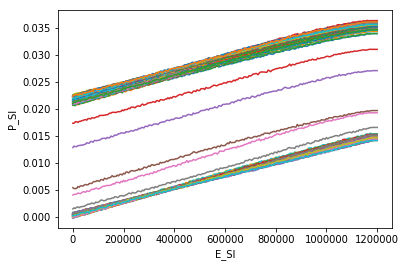

In [302]:
# 检测 P over T 在不同电场下是不是正常
# E = P_upper_fitting.loc[0,temperature[0]:] 
# plt.plot(P_upper_fitting.loc[0,'359.93':])# index0 > E= 0
# plt.plot(P_upper_fitting.loc[240,'359.93':])# index 240 > E= Emax, which is 12 kV/cm
# plt.plot(P_upper_fitting.loc[120,'359.93':])# index 120 > E= 0.5*Emax, which is 6 kV/cm
# plt.show()

# 检测 P over E 在不同温度下是不是正常
i = 0
for j in range(len(temperature)):
    plt.plot(P_upper_fitting['E_SI'], P_upper_fitting[(temperature[i])])
    i = i +1

plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show()

P_upper_fitting.to_csv(output_path+'.csv', index=None)

# P_upper 得到以后 construct P(T) at E

In [303]:
P_T = P_upper_fitting.transpose()
P_T.head(5)
# P_T.to_csv('C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\PT matrix2'+'.csv')

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
E_SI,0.000000,5000.000000,10000.000000,15000.000000,20000.000000,25000.000000,30000.000000,35000.000000,40000.000000,45000.000000,...,1.155000e+06,1.160000e+06,1.165000e+06,1.170000e+06,1.175000e+06,1.180000e+06,1.185000e+06,1.190000e+06,1.195000e+06,1.200000e+06
359.93,0.020671,0.020603,0.020801,0.020801,0.020861,0.020972,0.020972,0.021085,0.021183,0.021285,...,3.369385e-02,3.384988e-02,3.384988e-02,3.384988e-02,3.384972e-02,3.384972e-02,3.387652e-02,3.387652e-02,3.387652e-02,3.387652e-02
360.05,0.020656,0.020789,0.020841,0.020841,0.020708,0.021040,0.020902,0.020962,0.021102,0.021261,...,3.485485e-02,3.489822e-02,3.492325e-02,3.488993e-02,3.493161e-02,3.493161e-02,3.493161e-02,3.493161e-02,3.493161e-02,3.493161e-02
360.41,0.020622,0.020622,0.020543,0.020915,0.020915,0.020773,0.021085,0.020992,0.020992,0.021065,...,3.378307e-02,3.384918e-02,3.384918e-02,3.379013e-02,3.391495e-02,3.389430e-02,3.388863e-02,3.388863e-02,3.388863e-02,3.388863e-02
360.8,0.020957,0.020957,0.020884,0.021012,0.021118,0.021371,0.021250,0.021250,0.021250,0.021439,...,3.438462e-02,3.438462e-02,3.446381e-02,3.446381e-02,3.443413e-02,3.445151e-02,3.445151e-02,3.445151e-02,3.445151e-02,3.445151e-02


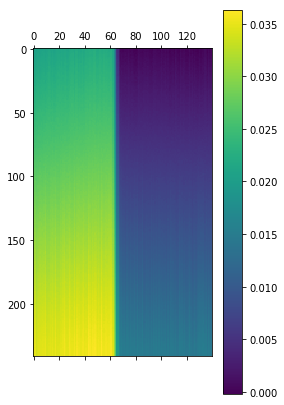

In [305]:
mpl.pyplot.matshow(P_T[1:].transpose(),interpolation='nearest',cmap='viridis')# 省略第一行
# plt.axis([58,70,0,10])
plt.colorbar()
plt.show()

P_T.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_PUND\dS\PET phase diagram'+'.csv')

In [306]:
E = P_T.loc["E_SI"]

dPdT_T = P_T.drop(["E_SI"])
dPdT_T.head(5)

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
359.93,0.020671,0.020603,0.020801,0.020801,0.020861,0.020972,0.020972,0.021085,0.021183,0.021285,...,0.033694,0.033850,0.033850,0.033850,0.033850,0.033850,0.033877,0.033877,0.033877,0.033877
360.05,0.020656,0.020789,0.020841,0.020841,0.020708,0.021040,0.020902,0.020962,0.021102,0.021261,...,0.034855,0.034898,0.034923,0.034890,0.034932,0.034932,0.034932,0.034932,0.034932,0.034932
360.41,0.020622,0.020622,0.020543,0.020915,0.020915,0.020773,0.021085,0.020992,0.020992,0.021065,...,0.033783,0.033849,0.033849,0.033790,0.033915,0.033894,0.033889,0.033889,0.033889,0.033889
360.80,0.020957,0.020957,0.020884,0.021012,0.021118,0.021371,0.021250,0.021250,0.021250,0.021439,...,0.034385,0.034385,0.034464,0.034464,0.034434,0.034452,0.034452,0.034452,0.034452,0.034452
361.17,0.020922,0.020922,0.020989,0.021139,0.021248,0.021320,0.021184,0.021425,0.021425,0.021425,...,0.034450,0.034536,0.034536,0.034580,0.034629,0.034629,0.034629,0.034629,0.034629,0.034629


359.93
395.08
140


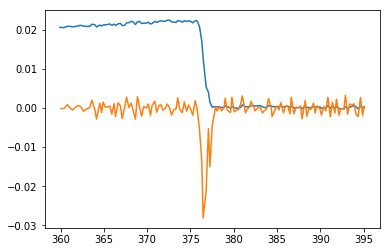

In [307]:
# 做出 T的这个list，因为# dPdT_T.index 的格式不能直接运算，所以新创一个list
i = 0
T = list()
for it in range(len(dPdT_T.index)):
    T.append(dPdT_T.index[i])
    i = i+1
print(min(T))
print(max(T))
print(len(T))

# 看看 P（T）不smooth 的微分效果怎么样，是不是需要平滑
x = T
y = dPdT_T[0]
dx = np.diff(x)
dy = np.diff(y)



plt.plot(y)
plt.plot(x[1:],dy/dx)
plt.show()

# 此处是关键的Gaussian smooth

In [320]:
# 构建一个新的个dataframe, 经过插点和smooth的 PT @ E


Smoothed_PTatE = pd.DataFrame()
T_insert = np.linspace(min(T), max(T), num=140)#插140个点,等比例插点，看之前非pund的 插点的密度
Smoothed_PTatE.insert(len(Smoothed_PTatE.columns), "T", T_insert)

i=0
for row in dPdT_T.iteritems():
    x = T
    y = dPdT_T[i]
    f = interp1d(x, y,kind='cubic')
    y_smooth = gaussian_filter1d(f(T_insert), 1)
    Smoothed_PTatE.insert(len(Smoothed_PTatE.columns), str(i), y_smooth)
    
    i = i+1
    
Smoothed_PTatE.head(5)

,T,0,1,2,3,4,5,6,7,8,...,231,232,233,234,235,236,237,238,239,240
0,359.930000,0.020654,0.020654,0.020766,0.020830,0.020825,0.020951,0.020968,0.021033,0.021126,...,0.034032,0.034143,0.034149,0.034129,0.034164,0.034160,0.034173,0.034173,0.034173,0.034173
1,360.182878,0.020653,0.020690,0.020711,0.020869,0.020834,0.020926,0.021001,0.021005,0.021075,...,0.034183,0.034255,0.034267,0.034230,0.034297,0.034289,0.034291,0.034291,0.034291,0.034291
2,360.435755,0.020710,0.020735,0.020683,0.020923,0.020924,0.020969,0.021091,0.021049,0.021076,...,0.034125,0.034171,0.034195,0.034155,0.034226,0.034218,0.034216,0.034216,0.034216,0.034216
3,360.688633,0.020830,0.020828,0.020771,0.020989,0.021058,0.021147,0.021182,0.021174,0.021174,...,0.034164,0.034199,0.034241,0.034225,0.034259,0.034261,0.034258,0.034258,0.034258,0.034258
4,360.941511,0.020911,0.020916,0.020899,0.021055,0.021149,0.021294,0.021210,0.021301,0.021308,...,0.034356,0.034396,0.034436,0.034449,0.034466,0.034473,0.034474,0.034474,0.034474,0.034474


In [319]:
Smoothed_PTatE.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_PUND\dS\Smoothed_PTatE_gaussian 1'+'.csv')
dPdT_T.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_PUND\dS\Nosmooth_PTatE'+'.csv')

# 对PT @ E 做插点和smooth

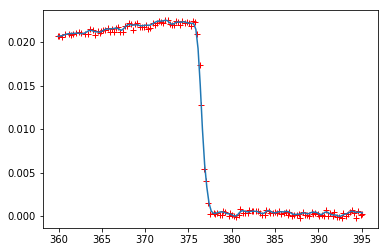

In [321]:
plt.plot(T,dPdT_T[0],'r+')
plt.plot(Smoothed_PTatE["T"],Smoothed_PTatE["1"])
plt.show()

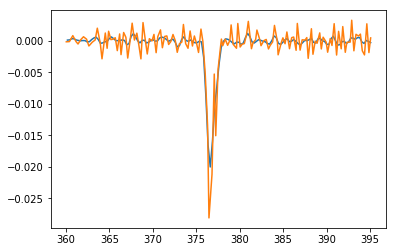

In [322]:
####单列求dP/dT
#### 下面对所有列批量操作

i = 1
x = Smoothed_PTatE["T"]
y = Smoothed_PTatE["1"]

dx = np.diff(x)
dy = np.diff(y)
dydx = dy/dx

plt.plot(x[1:],dydx)

#smooth 之前的数据，做比较
plt.plot(T[1:],  np.diff(dPdT_T[0])/np.diff(T))

plt.show()

In [323]:
### 批量操作求dP/dT
dPdT_diff = pd.DataFrame()
x = Smoothed_PTatE["T"] 
dx = np.diff(x)


i = 0
for row in range(len(Smoothed_PTatE.columns)-1):
    y = Smoothed_PTatE[str(i)]
    dy = np.diff(y)
    dydx = dy/dx
# #     column_name = str(temperature[i])
    dPdT_diff.insert(len(dPdT_diff.columns), str(i), pd.Series(dydx))
    i = i+1
    
dPdT_diff.insert(0, "T", x)
dPdT_diff.head(400)

,T,0,1,2,3,4,5,6,7,8,...,231,232,233,234,235,236,237,238,239,240
0,359.930000,-0.000004,0.000143,-0.000219,0.000154,0.000037,-1.010480e-04,0.000131,-0.000108,-2.014008e-04,...,0.000596,0.000444,0.000467,0.000398,0.000526,0.000509,0.000465,0.000465,0.000465,0.000465
1,360.182878,0.000226,0.000178,-0.000109,0.000211,0.000356,1.705096e-04,0.000356,0.000173,4.236341e-06,...,-0.000230,-0.000334,-0.000285,-0.000296,-0.000280,-0.000277,-0.000297,-0.000297,-0.000297,-0.000297
2,360.435755,0.000473,0.000366,0.000346,0.000263,0.000531,7.064476e-04,0.000360,0.000495,3.885549e-04,...,0.000156,0.000112,0.000182,0.000275,0.000131,0.000167,0.000168,0.000168,0.000168,0.000168
3,360.688633,0.000322,0.000348,0.000510,0.000261,0.000359,5.805937e-04,0.000109,0.000500,5.281806e-04,...,0.000757,0.000779,0.000771,0.000887,0.000819,0.000840,0.000854,0.000854,0.000854,0.000854
4,360.941511,-0.000045,0.000165,0.000286,0.000065,-0.000117,-7.933578e-05,-0.000084,0.000176,4.146623e-04,...,0.000457,0.000478,0.000407,0.000441,0.000523,0.000518,0.000579,0.000579,0.000579,0.000579
5,361.194388,-0.000111,0.000088,0.000109,0.000004,-0.000277,-2.603209e-04,0.000084,-0.000059,2.926770e-04,...,0.000197,0.000135,0.000154,0.000100,0.000166,0.000175,0.000226,0.000226,0.000226,0.000226
6,361.447266,0.000182,0.000031,0.000243,0.000256,0.000197,1.427601e-05,0.000439,0.000046,1.564497e-04,...,0.000205,0.000176,0.000241,0.000161,0.000157,0.000172,0.000139,0.000139,0.000139,0.000139
7,361.700144,0.000437,0.000075,0.000429,0.000299,0.000454,1.575408e-04,0.000439,0.000184,-8.992239e-08,...,0.000262,0.000340,0.000290,0.000234,0.000227,0.000210,0.000172,0.000172,0.000172,0.000172
8,361.953022,0.000327,0.000062,0.000039,0.000029,0.000280,1.940730e-04,0.000024,0.000118,-3.119106e-06,...,0.000227,0.000298,0.000229,0.000266,0.000217,0.000192,0.000177,0.000177,0.000177,0.000177
9,362.205899,-0.000086,-0.000145,-0.000488,-0.000241,-0.000020,4.137217e-05,-0.000388,-0.000240,-4.317356e-05,...,0.000255,0.000190,0.000229,0.000287,0.000201,0.000193,0.000175,0.000174,0.000174,0.000174


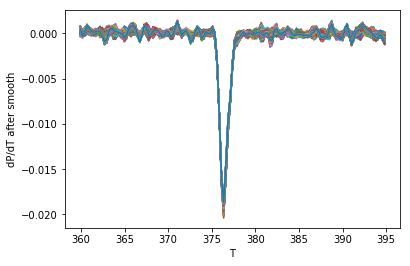

In [324]:
# dP/dT over T, 看看形状对不对

i = 0
for j in range(len(dPdT_diff.columns)-1):
    plt.plot(dPdT_diff['T'], dPdT_diff[str(i)])
    i = i +1

plt.xlabel('T')
plt.ylabel('dP/dT after smooth')
# plt.axis([375,379,-0.0045,-0.00576])
plt.show()

In [325]:
dPdT_trans = dPdT_diff.transpose()
# print(dPdT_trans.head(10))
dPdT_trans = dPdT_trans.drop(["T"])
dPdT_trans.insert(0, "E", np.linspace(0, 1200000, num=241, endpoint=True))
dPdT_trans.head(250)

,E,0,1,2,3,4,5,6,7,8,...,129,130,131,132,133,134,135,136,137,138
0,0.0,-4.332068e-06,0.000226,0.000473,0.000322,-0.000045,-0.000111,0.000182,4.370890e-04,0.000327,...,0.000460,0.000482,0.000382,0.000618,0.000410,-4.391058e-04,-0.000621,9.211230e-05,0.000120,-0.000099
1,5000.0,1.432482e-04,0.000178,0.000366,0.000348,0.000165,0.000088,0.000031,7.494522e-05,0.000062,...,0.000488,0.000457,0.000268,0.000523,0.000554,-1.433808e-04,-0.000388,8.845639e-05,-0.000059,-0.000258
2,10000.0,-2.186634e-04,-0.000109,0.000346,0.000510,0.000286,0.000109,0.000243,4.292631e-04,0.000039,...,0.000583,0.000416,0.000169,0.000478,0.000563,-1.715543e-04,-0.000419,2.634661e-04,0.000091,-0.000375
3,15000.0,1.542999e-04,0.000211,0.000263,0.000261,0.000065,0.000004,0.000256,2.988084e-04,0.000029,...,0.000197,0.000347,0.000368,0.000471,0.000423,-2.021114e-04,-0.000551,4.557143e-05,0.000131,-0.000093
4,20000.0,3.670630e-05,0.000356,0.000531,0.000359,-0.000117,-0.000277,0.000197,4.542149e-04,0.000280,...,0.000548,0.000468,0.000260,0.000417,0.000391,-1.607573e-04,-0.000272,1.774374e-04,-0.000035,-0.000311
5,25000.0,-1.010480e-04,0.000171,0.000706,0.000581,-0.000079,-0.000260,0.000014,1.575408e-04,0.000194,...,0.000487,0.000367,0.000294,0.000398,0.000338,-2.283626e-04,-0.000511,-9.937570e-07,-0.000039,-0.000291
6,30000.0,1.305486e-04,0.000356,0.000360,0.000109,-0.000084,0.000084,0.000439,4.386221e-04,0.000024,...,0.000178,0.000283,0.000330,0.000406,0.000423,3.433561e-05,-0.000268,-4.476837e-05,-0.000016,0.000014
7,35000.0,-1.076762e-04,0.000173,0.000495,0.000500,0.000176,-0.000059,0.000046,1.844568e-04,0.000118,...,0.000081,0.000004,0.000332,0.000768,0.000581,-2.141661e-04,-0.000506,6.274692e-05,0.000124,-0.000050
8,40000.0,-2.014008e-04,0.000004,0.000389,0.000528,0.000415,0.000293,0.000156,-8.992239e-08,-0.000003,...,0.000380,0.000216,0.000129,0.000502,0.000603,-1.706320e-04,-0.000621,-4.887686e-05,0.000093,-0.000052
9,45000.0,-1.918888e-04,0.000022,0.000422,0.000414,0.000186,0.000179,0.000212,1.644006e-04,0.000065,...,0.000626,0.000552,0.000328,0.000430,0.000452,-1.533602e-04,-0.000517,9.212727e-05,0.000179,-0.000129


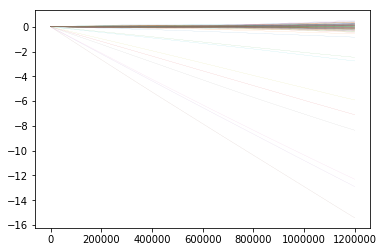

,E,0,1,2,3,4,5,6,7,8,...,129,130,131,132,133,134,135,136,137,138
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5000.0,0.347290,1.010124,2.098480,1.674279,0.300146,-0.058808,0.531788,1.280085,0.972284,...,2.369349,2.348182,1.626185,2.851113,2.408777,-1.456217,-2.522300,0.451422,0.153496,-0.891128
2,10000.0,0.158752,1.182887,3.879403,3.818846,1.429521,0.433012,1.217089,2.540606,1.224008,...,5.046049,4.531029,2.720430,5.353932,5.200701,-2.243554,-4.539486,1.331228,0.234410,-2.471820
3,15000.0,-0.002156,1.438625,5.401442,5.745409,2.308421,0.715709,2.464789,4.360785,1.393683,...,6.995727,6.437904,4.064622,7.726819,7.666142,-3.177719,-6.963295,2.103822,0.790795,-3.642380
4,20000.0,0.475359,2.857874,7.384982,7.295870,2.179114,0.033758,3.597769,6.243343,2.166051,...,8.859204,8.474560,5.636093,9.947364,9.702755,-4.084890,-9.019205,2.661344,1.031135,-4.654511
5,25000.0,0.314505,4.175388,10.477626,9.645570,1.688203,-1.309553,4.126008,7.772732,3.351565,...,11.446198,10.562164,7.022183,11.985628,11.527598,-5.057690,-10.977099,3.102453,0.845452,-6.159669
6,30000.0,0.388256,5.491754,13.142505,11.370317,1.279258,-1.750874,5.258694,9.263139,3.897320,...,13.107444,12.189502,8.582866,13.995866,13.431447,-5.542757,-12.925306,2.988048,0.707583,-6.850844
7,35000.0,0.445437,6.814433,15.280003,12.893277,1.509092,-1.688892,6.469594,10.820836,4.254070,...,13.753738,12.909240,10.238806,16.932049,15.940432,-5.992334,-14.859260,3.032994,0.978058,-6.940240
8,40000.0,-0.327255,7.257611,17.490128,15.463424,2.986188,-1.104699,6.974622,11.281754,4.542450,...,14.904566,13.460652,11.392400,20.106502,18.900007,-6.954329,-17.675525,3.067669,1.521908,-7.194415
9,45000.0,-1.310479,7.322890,19.517273,17.818998,4.487627,0.074101,7.895861,11.692530,4.697576,...,17.418334,15.380514,12.534754,22.435996,21.538715,-7.764309,-20.519046,3.175795,2.202377,-7.645823


In [326]:
dPdT_inteE = pd.DataFrame()
# dPdT_inteE.insert(len(inteE.columns), str(i), pd.Series(dydx))


i = 0 

for j in range(139):
    x = dPdT_trans['E']
    y = dPdT_trans[i]
    y_integration = integrate.cumtrapz(y, x, initial=0)
    dPdT_inteE.insert(len(dPdT_inteE.columns), str(i), pd.Series(y_integration))
    # print(y_integration)
    plt.plot(x,y_integration/1496, linestyle='dashed',linewidth=0.1, markersize=1)
    i = i+1
plt.show()
dPdT_inteE.insert(0, "E", np.linspace(0, 1200000, num=241, endpoint=True))
dPdT_inteE.head(300)


In [327]:
dPdT_final = dPdT_inteE.transpose()
# print(dPdT_inteE.head(10))
dPdT_final = dPdT_final.drop(["E"])
# dPdT_inteE.head(400)
dPdT_final.insert(0, "T",T_insert[:-1])
# print(T_insert[:-1])
dPdT_final.head(400)

,T,0,1,2,3,4,5,6,7,8,...,231,232,233,234,235,236,237,238,239,240
0,359.930000,0.0,0.347290,0.158752,-0.002156,0.475359,0.314505,0.388256,0.445437,-0.327255,...,358.222104,360.823719,363.101796,365.265095,367.575064,370.162407,372.598704,374.925263,377.251821,379.578380
1,360.182878,0.0,1.010124,1.182887,1.438625,2.857874,4.175388,5.491754,6.814433,7.257611,...,-43.559394,-44.971311,-46.519371,-47.970996,-49.411291,-50.804985,-52.240730,-53.726145,-55.211560,-56.696974
2,360.435755,0.0,2.098480,3.879403,5.401442,7.384982,10.477626,13.142505,15.280003,17.490128,...,183.791188,184.460249,185.195446,186.338158,187.351667,188.094591,188.930294,189.768834,190.607374,191.445913
3,360.688633,0.0,1.674279,3.818846,5.745409,7.295870,9.645570,11.370317,12.893277,15.463424,...,527.219535,531.058310,534.931693,539.075615,543.339977,547.488470,551.723751,555.991946,560.260141,564.528335
4,360.941511,0.0,0.300146,1.429521,2.308421,2.179114,1.688203,1.279258,1.509092,2.986188,...,386.052943,388.390155,390.604684,392.724737,395.134314,397.738305,400.482700,403.379912,406.277121,409.174330
5,361.194388,0.0,-0.058808,0.433012,0.715709,0.033758,-1.309553,-1.750874,-1.688892,-1.104699,...,212.670497,213.500442,214.223702,214.860144,215.524989,216.376580,217.378238,218.506735,219.635234,220.763732
6,361.447266,0.0,0.531788,1.217089,2.464789,3.597769,4.126008,5.258694,6.469594,6.974622,...,112.015270,112.968018,114.008845,115.011678,115.805907,116.628315,117.404827,118.098777,118.792725,119.486672
7,361.700144,0.0,1.280085,2.540606,4.360785,6.243343,7.772732,9.263139,10.820836,11.281754,...,102.724109,104.227194,105.802188,107.112409,108.263159,109.355664,110.311798,111.172087,112.032280,112.892473
8,361.953022,0.0,0.972284,1.224008,1.393683,2.166051,3.351565,3.897320,4.254070,4.542450,...,208.366161,209.678497,210.996492,212.233684,213.441316,214.465068,215.389479,216.275692,217.161633,218.047575
9,362.205899,0.0,-0.577647,-2.159382,-3.981050,-4.632005,-4.577380,-5.444041,-7.014377,-7.722557,...,286.518159,287.629298,288.675618,289.965716,291.185459,292.170537,293.091534,293.964535,294.835176,295.705817


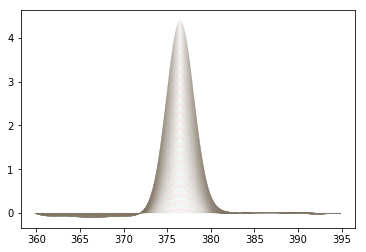

In [299]:
#这是 gaussina 6 出来的结果，只是为了和下面做对比

i = 0 

for j in range(240):
    x = dPdT_final['T']
    y = dPdT_final[i]
    plt.plot(x,y/-1496, linestyle='dashed',linewidth=0.1, markersize=1)
    i = i+1
plt.show()

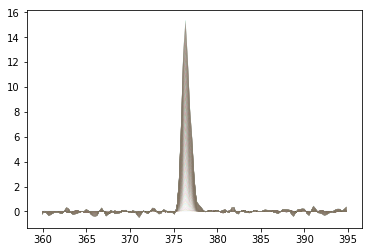

In [328]:
i = 0 

for j in range(240):
    x = dPdT_final['T']
    y = dPdT_final[i]
    plt.plot(x,y/-1496, linestyle='dashed',linewidth=0.1, markersize=1)
    i = i+1
plt.show()

In [329]:
dPdT_final.to_csv(r'C:\PhD-Zipeng\Research projects\DABCO\BF4\No16_PUND\dS\dS_volume_heating_Guassian 1'+'.csv')

# 
P_upper_fitting

>transpose>

P_T

>drop ["E_SI']>

dPdT_T

>Smooth>

Smoothed_PTatE

>dy = np.diff(y)>

dPdT_diff

>transpose>

dPdT_inteE 

>integrate.cumtrapz(y, x, initial=0)>

dPdT_final

>transpose>